In [72]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dont-overfit-ii/sample_submission.csv
/kaggle/input/dont-overfit-ii/train.csv
/kaggle/input/dont-overfit-ii/test.csv


In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [74]:
train = pd.read_csv('/kaggle/input/dont-overfit-ii/train.csv')
test = pd.read_csv('/kaggle/input/dont-overfit-ii/test.csv')
submission=pd.read_csv('/kaggle/input/dont-overfit-ii/sample_submission.csv')

# train.shape, test.shape, submission.shape

y=train['target']
X=train.drop(["id", "target"], axis=1)
test = test.drop(["id"], axis=1)

# 1. Data Cleaning & Preparation

In [75]:
train.head()

,id,target,0,1,2,3,4,5,6,7,...,290,291,292,293,294,295,296,297,298,299
0,0,1.0,-1.067,-1.114,-0.616,0.376,1.090,0.467,-0.422,0.460,...,0.220,-0.339,0.254,-0.179,0.352,0.125,0.347,0.436,0.958,-0.824
1,1,0.0,-0.831,0.271,1.716,1.096,1.731,-0.197,1.904,-0.265,...,-0.765,-0.735,-1.158,2.554,0.856,-1.506,0.462,-0.029,-1.932,-0.343
2,2,0.0,0.099,1.390,-0.732,-1.065,0.005,-0.081,-1.450,0.317,...,-1.311,0.799,-1.001,1.544,0.575,-0.309,-0.339,-0.148,-0.646,0.725
3,3,1.0,-0.989,-0.916,-1.343,0.145,0.543,0.636,1.127,0.189,...,-1.370,1.093,0.596,-0.589,-0.649,-0.163,-0.958,-1.081,0.805,3.401
4,4,0.0,0.811,-1.509,0.522,-0.360,-0.220,-0.959,0.334,-0.566,...,-0.178,0.718,-1.017,1.249,-0.596,-0.445,1.751,1.442,-0.393,-0.643


In [76]:
test.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-0.677,1.721,-0.745,-0.838,0.149,-1.138,0.242,0.504,-1.829,-1.380,...,-1.180,-0.403,0.759,-0.600,0.951,-0.349,0.446,-0.819,-0.277,1.297
1,-0.731,-0.251,0.059,0.054,1.149,2.462,0.836,0.719,-2.269,0.584,...,1.297,1.114,0.657,0.760,0.899,-1.612,-1.701,1.107,-0.314,-0.641
2,1.119,1.036,1.220,1.518,0.265,-0.088,0.245,-0.533,-0.921,0.714,...,-0.864,-0.736,0.367,0.154,0.830,-1.352,0.914,0.377,0.588,-0.912
3,-0.933,0.212,-0.053,0.570,-1.540,-1.108,0.462,1.022,-0.215,-0.205,...,0.063,-0.958,0.762,-0.213,-2.171,0.830,1.435,0.125,2.782,0.619
4,-0.208,-0.556,2.641,0.853,-0.384,0.312,0.514,0.481,-1.929,-0.400,...,-0.689,0.213,0.568,-0.935,-0.015,0.267,0.739,1.340,-0.178,1.010


In [77]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Columns: 302 entries, id to 299
dtypes: float64(301), int64(1)
memory usage: 590.0 KB


In [78]:
train.isnull().any().any()

False

In [79]:
train.duplicated().sum()

0

In [80]:
train.describe()

,id,target,0,1,2,3,4,5,6,7,...,290,291,292,293,294,295,296,297,298,299
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,...,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,124.500000,0.268000,-0.098064,0.001208,0.090680,-0.122248,0.011500,-0.116624,0.006932,0.100988,...,0.013052,0.007500,0.000452,0.060276,-0.090308,-0.040728,-0.002132,-0.012540,-0.039904,0.073236
std,72.312977,0.443806,0.996063,0.955117,0.968065,0.933001,0.945662,1.081705,1.014091,1.028042,...,1.027845,1.048169,1.026398,1.048744,1.008657,1.051273,1.065524,0.958744,0.948251,0.924989
min,0.000000,0.000000,-3.181000,-3.041000,-2.967000,-2.898000,-2.837000,-3.831000,-2.873000,-2.489000,...,-2.824000,-2.971000,-3.592000,-3.071000,-2.621000,-3.013000,-3.275000,-2.665000,-3.006000,-2.471000
25%,62.250000,0.000000,-0.756250,-0.624750,-0.515750,-0.695500,-0.678000,-0.758500,-0.646250,-0.589000,...,-0.764000,-0.729250,-0.699750,-0.589000,-0.701000,-0.696750,-0.555750,-0.677500,-0.719750,-0.559000
50%,124.500000,0.000000,-0.064500,-0.008000,0.067500,-0.090000,0.028000,-0.073500,-0.076500,0.104500,...,0.017500,0.053000,0.029500,0.042500,-0.102000,-0.057000,0.094500,-0.025500,-0.027500,0.160500
75%,186.750000,1.000000,0.647750,0.493250,0.716000,0.436250,0.625250,0.554250,0.676500,0.717000,...,0.690500,0.665000,0.670750,0.713250,0.532250,0.727000,0.590000,0.671000,0.717000,0.711000
max,249.000000,1.000000,2.347000,3.138000,2.609000,2.590000,2.413000,2.687000,2.793000,3.766000,...,2.773000,2.701000,3.193000,4.280000,2.716000,3.074000,2.626000,2.388000,2.730000,3.401000


In [81]:
train['target'].value_counts()

target
0.0    183
1.0     67
Name: count, dtype: int64

## 1.1 Statistics Analysis

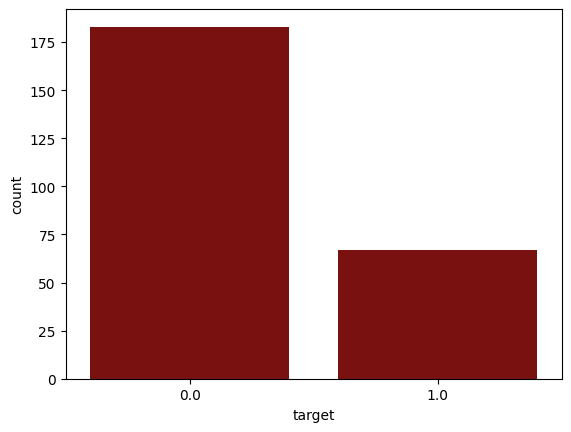

In [82]:
p = sns.countplot(data=train, x="target", color="darkred")
plt.show()

### Balance the dataset with synthetic samples using SMOTE
reference: https://www.kaggle.com/code/rafjaa/resampling-strategies-for-imbalanced-datasets

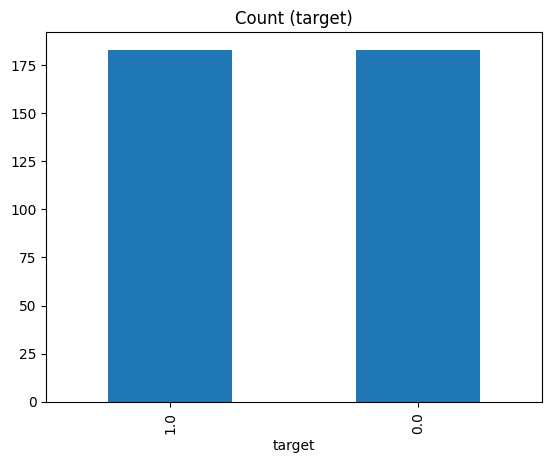

In [83]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority', n_jobs=-1)
X_sm, y_sm = smote.fit_resample(X, train['target'])

df = pd.DataFrame(X_sm)
df['target'] = y_sm

df['target'].value_counts().plot(kind='bar', title='Count (target)');

Text(0, 0.5, 'Frequency')

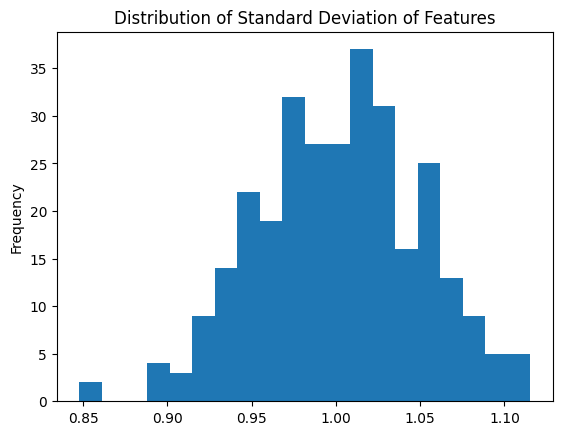

In [84]:
std_values = train[train.columns[2:]].std()
plt.hist(std_values, bins=20)
plt.title('Distribution of Standard Deviation of Features')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

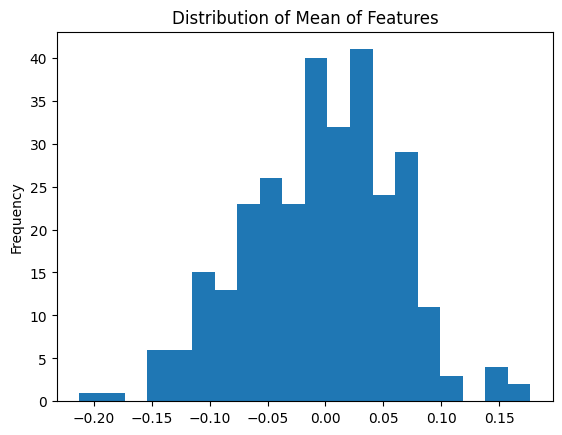

In [85]:
mean_values = train[train.columns[2:]].mean()
plt.hist(mean_values, bins=20)
plt.title('Distribution of Mean of Features')
plt.ylabel('Frequency')

Distributions of first 28 columns


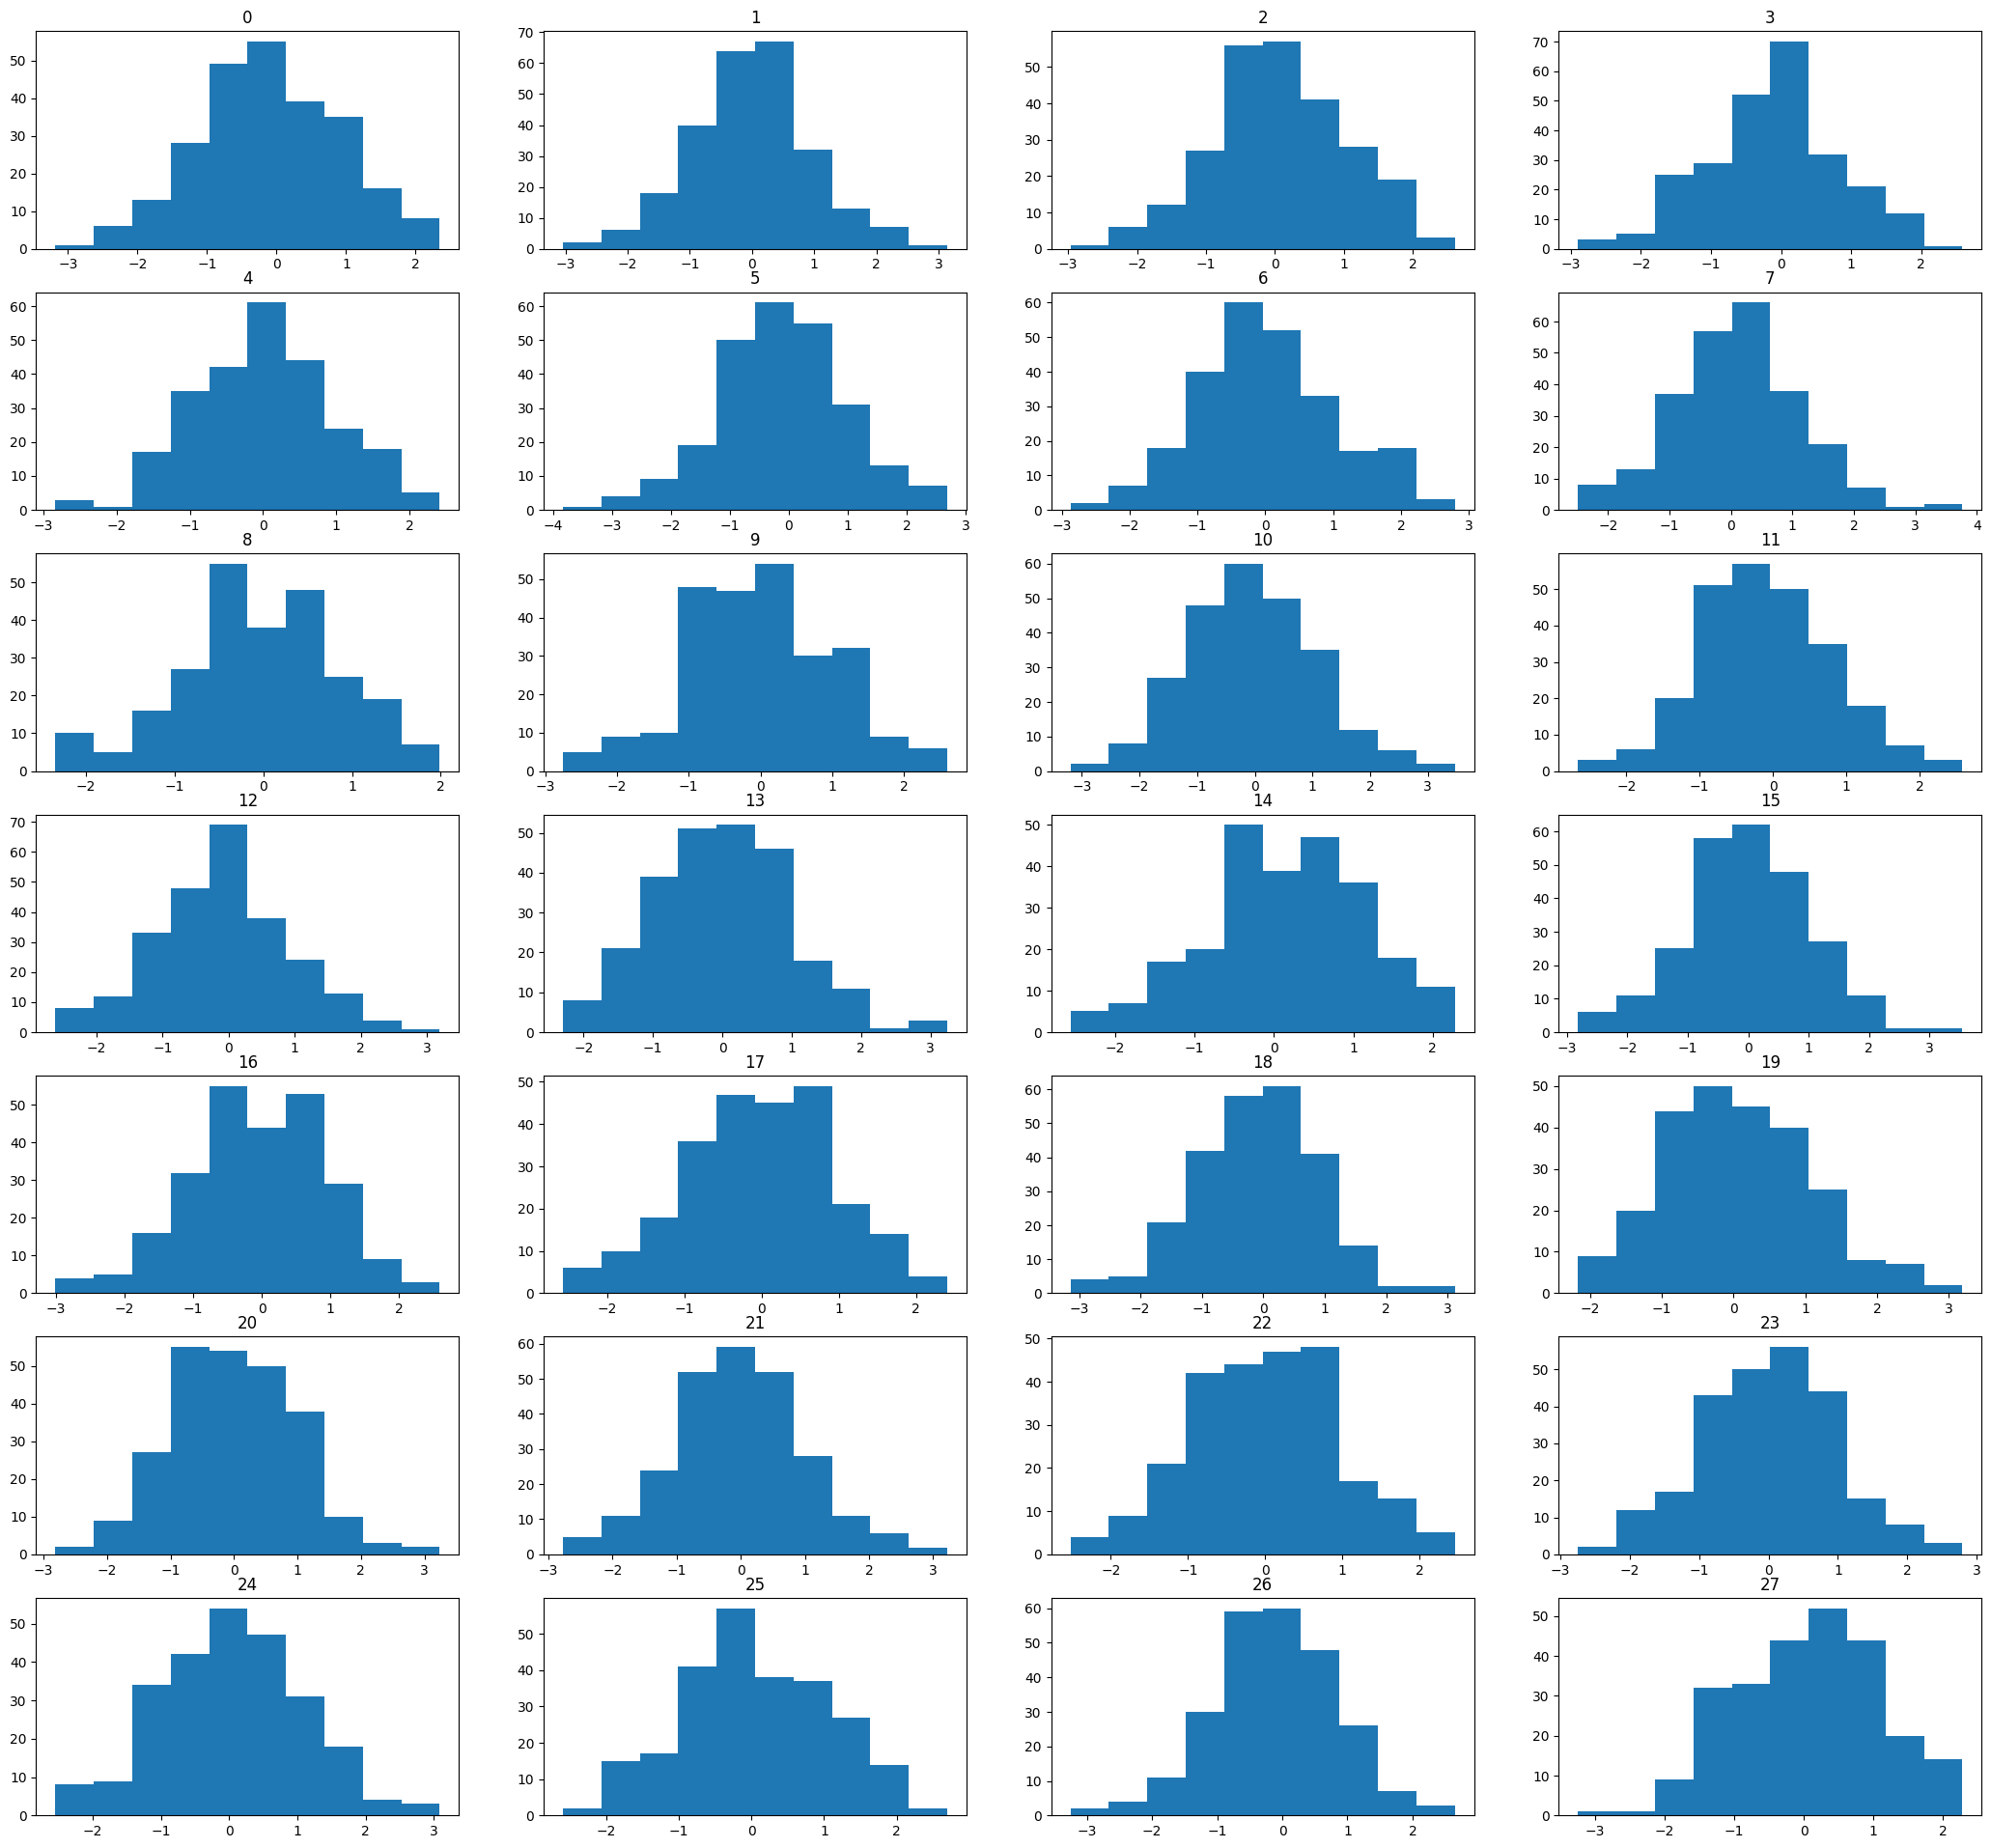

In [86]:
print('Distributions of first 28 columns')
plt.figure(figsize=(26, 24))
for i, col in enumerate(list(train.columns)[2:30]):
    plt.subplot(7, 4, i + 1)
    plt.hist(train[col])
    plt.title(col)

## 1.2 feature Analysis

In [87]:
train_temp = train.drop(['id'], axis=1)
train_temp.corr()

,target,0,1,2,3,4,5,6,7,8,...,290,291,292,293,294,295,296,297,298,299
target,1.000000,-0.085268,-0.111172,-0.036050,0.153317,0.077830,0.006206,0.090943,-0.003443,0.020330,...,-0.003138,-0.105296,0.010295,-0.016191,0.035138,-0.071524,-0.020375,-0.065313,-0.012973,0.050805
0,-0.085268,1.000000,0.039939,0.069846,-0.139829,0.079360,-0.063259,-0.071990,0.016923,0.043081,...,-0.022926,-0.052895,-0.020901,-0.012124,-0.007601,0.041362,0.009961,-0.002739,0.092893,0.065807
1,-0.111172,0.039939,1.000000,0.023237,-0.096873,-0.052313,0.048742,-0.086880,-0.013418,-0.005268,...,0.002967,0.013950,0.002014,-0.013278,0.090214,-0.060408,-0.192962,0.025713,-0.049503,0.010546
2,-0.036050,0.069846,0.023237,1.000000,-0.107534,0.077051,-0.044687,-0.086411,0.000560,0.028217,...,0.051288,-0.041872,-0.101789,0.000431,0.078297,0.151670,-0.030104,-0.025195,-0.086761,-0.169051
3,0.153317,-0.139829,-0.096873,-0.107534,1.000000,-0.068026,-0.009757,0.049916,-0.063416,0.069039,...,-0.050296,-0.002434,-0.044130,-0.049341,-0.010336,0.019118,-0.049607,-0.008971,-0.052998,0.076426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,-0.071524,0.041362,-0.060408,0.151670,0.019118,-0.014687,0.070082,-0.069957,0.048203,0.113801,...,0.032321,0.080775,0.012047,-0.047029,-0.056763,1.000000,-0.045375,-0.036558,-0.013592,-0.022727
296,-0.020375,0.009961,-0.192962,-0.030104,-0.049607,-0.002116,0.016213,-0.004527,-0.087313,-0.042409,...,0.065599,0.064637,-0.008712,0.062668,-0.001654,-0.045375,1.000000,-0.040571,0.101211,-0.060556
297,-0.065313,-0.002739,0.025713,-0.025195,-0.008971,-0.031669,0.074662,0.007120,-0.047059,0.013366,...,-0.014895,-0.014151,-0.071989,0.076124,0.092265,-0.036558,-0.040571,1.000000,-0.000301,-0.112310
298,-0.012973,0.092893,-0.049503,-0.086761,-0.052998,-0.044680,0.032147,-0.020821,-0.061363,0.019664,...,0.094907,0.012625,-0.005793,-0.043315,0.042214,-0.013592,0.101211,-0.000301,1.000000,0.072470


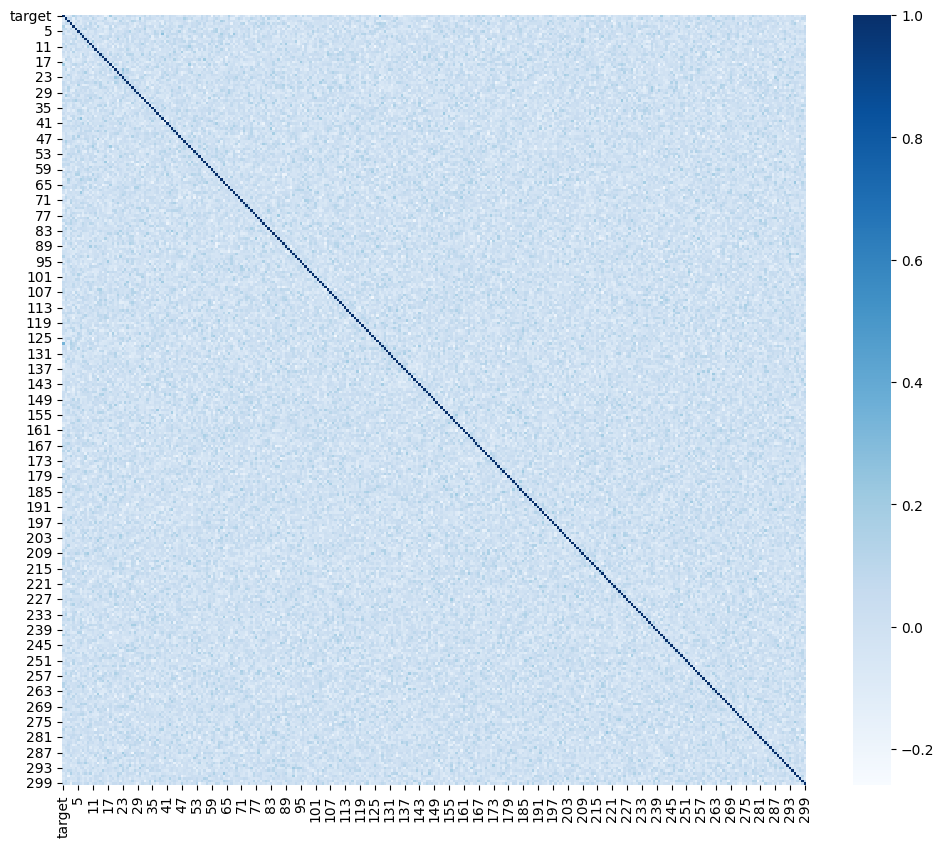

In [88]:
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(train_temp.corr(), ax=ax,  cmap='Blues')
plt.show()

In [89]:
# extract important feature from correlation
corr_matrix = train_temp.corr()
target_corr = corr_matrix['target'].abs().sort_values(ascending=False)
top_10_features = target_corr.head(11).index
top_corr_matrix = train_temp[top_10_features].corr()
top_corr_matrix

,target,127,176,18,59,135,16,241,126,69,74
target,1.000000,0.337540,-0.217100,0.206452,-0.203166,-0.179960,-0.179796,0.173879,-0.167064,-0.164571,-0.157756
127,0.337540,1.000000,-0.080494,0.028445,-0.107301,-0.065822,-0.049682,0.102135,-0.028353,-0.053132,0.002009
176,-0.217100,-0.080494,1.000000,0.002698,0.026009,0.013927,0.020055,0.141216,0.031976,0.056577,-0.017664
18,0.206452,0.028445,0.002698,1.000000,-0.049571,0.003507,0.013268,0.005993,-0.023582,-0.085804,-0.057930
59,-0.203166,-0.107301,0.026009,-0.049571,1.000000,0.055680,0.092706,-0.021667,0.104020,0.042972,-0.030141
135,-0.179960,-0.065822,0.013927,0.003507,0.055680,1.000000,0.066729,0.092191,0.099418,0.044066,-0.016272
16,-0.179796,-0.049682,0.020055,0.013268,0.092706,0.066729,1.000000,-0.058023,-0.066579,0.000601,-0.013325
241,0.173879,0.102135,0.141216,0.005993,-0.021667,0.092191,-0.058023,1.000000,-0.088203,-0.141732,-0.006121
126,-0.167064,-0.028353,0.031976,-0.023582,0.104020,0.099418,-0.066579,-0.088203,1.000000,-0.048113,0.077258
69,-0.164571,-0.053132,0.056577,-0.085804,0.042972,0.044066,0.000601,-0.141732,-0.048113,1.000000,-0.031846


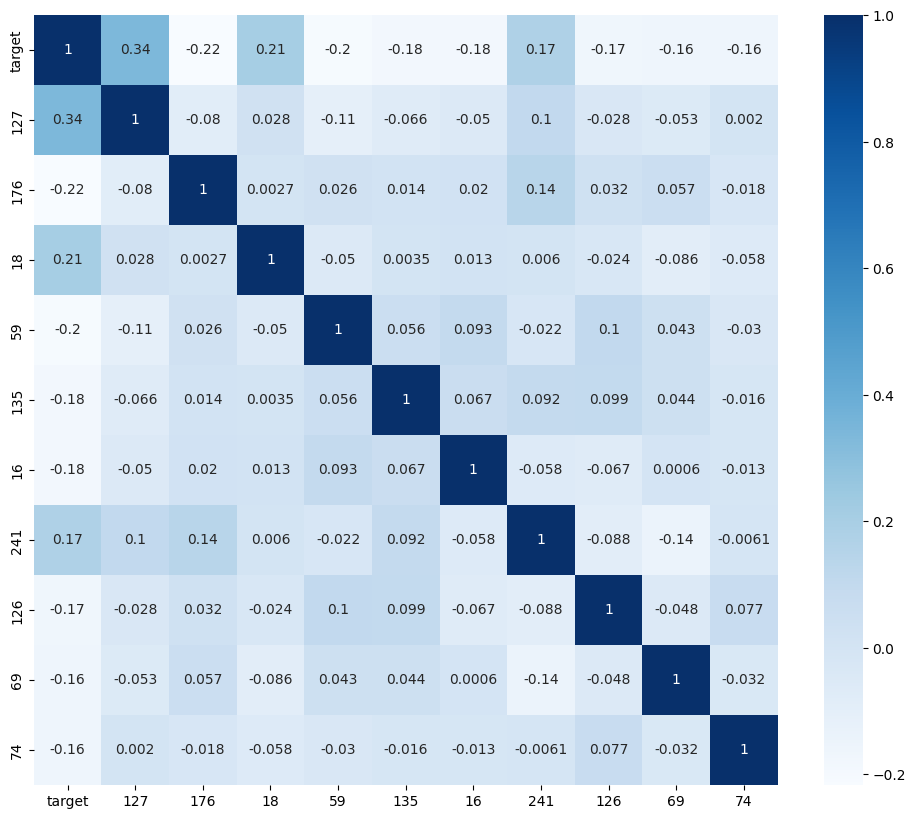

In [90]:
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(top_corr_matrix, ax=ax, annot=True, cmap='Blues')
plt.show()

# 2. Feature Engineering

In [91]:
from sklearn.model_selection import StratifiedKFold, RepeatedStratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score

from imblearn.over_sampling import SMOTE

### 2.1 Creating statistics features: mean+std

In [92]:
# create feature: mean + std
train = pd.read_csv('/kaggle/input/dont-overfit-ii/train.csv')
test = pd.read_csv('/kaggle/input/dont-overfit-ii/test.csv')


y=train['target']
X=train.drop(["id", "target"], axis=1)
test = test.drop(["id"], axis=1)

X_train = X
X_test = test
y_train = y
X_train['300'] = X_train.std(1)
X_test['300'] = X_test.std(1)
X_train['301'] = X_train.mean(1)
X_test['301'] = X_test.mean(1)

In [93]:
X_train.shape, X_test.shape, y_train.shape

((250, 302), (19750, 302), (250,))

### 2.2 Feature Transformation: Standard Scalar

In [94]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaler = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = X_scaler
y_train = y
X_test = test

In [95]:
X_train.shape, X_test.shape, y_train.shape

((250, 302), (19750, 302), (250,))

### 2.3 Feature Selection: Random Forest

In [96]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
feature_selector = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42))
X_train = feature_selector.fit_transform(X_train, y_train)
X_test = feature_selector.transform(X_test)

In [97]:
X_train.shape, X_test.shape, y_train.shape

((250, 113), (19750, 113), (250,))

### 2.4 Reduce Dimensionality - PCA

In [98]:
# retaining 95% of variance
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95, random_state=42)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [99]:
X_train_pca.shape, X_test_pca.shape, y_train.shape

((250, 90), (19750, 90))

# 3. Modelling Expectation for train dataset, split into train and validation set

In [100]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data to normalize feature distributions
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Feature selection using RandomForest
feature_selector = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42))
X_train_selected = feature_selector.fit_transform(X_train_scaled, y_train)
X_val_selected = feature_selector.transform(X_val_scaled)

# Use PCA to reduce dimensionality further, retaining 95% of variance
pca = PCA(n_components=0.95, random_state=42)
X_train_pca = pca.fit_transform(X_train_selected)
X_val_pca = pca.transform(X_val_selected)

In [101]:
from sklearn.model_selection import KFold, cross_val_score

from sklearn.linear_model import LogisticRegression, Lasso, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score, roc_auc_score

## 3.1 train multiple models and evaluate them

In [102]:
# Train multiple models and evaluate them
models = {
    'Logistic Regression': LogisticRegression(C=0.1, penalty='l2', random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(C=1.0, kernel='rbf', random_state=42, probability=True),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Gaussian NB': GaussianNB(),
    'AdaBoost': AdaBoostClassifier(n_estimators=100, random_state=42),
    'Lasso': Lasso(alpha=0.1, random_state=42),
    'SGDClassifier': SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
}

kf = KFold(n_splits=5, shuffle=True, random_state=42)

# store AUC score for plotting
model_auc_scores = {}

for model_name, model in models.items():
    auc_scores = []
    for train_index, val_index in kf.split(X_train_pca):
        X_kf_train, X_kf_val = X_train_pca[train_index], X_train_pca[val_index]
        y_kf_train, y_kf_val = y_train.iloc[train_index], y_train.iloc[val_index]
        model.fit(X_kf_train, y_kf_train)
        if hasattr(model, 'predict_proba'):
            y_kf_val_pred_prob = model.predict_proba(X_kf_val)[:, 1]
        elif hasattr(model, 'decision_function'):
            y_kf_val_pred_prob = model.decision_function(X_kf_val)
        else:
            y_kf_val_pred_prob = model.predict(X_kf_val)  # Use predictions directly for models without probability or decision function
        auc_scores.append(roc_auc_score(y_kf_val, y_kf_val_pred_prob))
    mean_auc = np.mean(auc_scores)
    std_auc = np.std(auc_scores)
    model_auc_scores[model_name] = (mean_auc, std_auc)
    print(f"K-Fold ROC AUC Score ({model_name}): {mean_auc:.4f} (+/- {std_auc:.4f})")

K-Fold ROC AUC Score (Logistic Regression): 0.7913 (+/- 0.0628)
K-Fold ROC AUC Score (Random Forest): 0.6693 (+/- 0.0775)
K-Fold ROC AUC Score (Gradient Boosting): 0.6258 (+/- 0.0473)
K-Fold ROC AUC Score (SVM): 0.8200 (+/- 0.0403)
K-Fold ROC AUC Score (KNN): 0.5992 (+/- 0.0476)
K-Fold ROC AUC Score (Decision Tree): 0.5235 (+/- 0.0418)
K-Fold ROC AUC Score (Gaussian NB): 0.6836 (+/- 0.0730)
K-Fold ROC AUC Score (AdaBoost): 0.6439 (+/- 0.1248)
K-Fold ROC AUC Score (Lasso): 0.6784 (+/- 0.0526)
K-Fold ROC AUC Score (SGDClassifier): 0.7669 (+/- 0.0670)


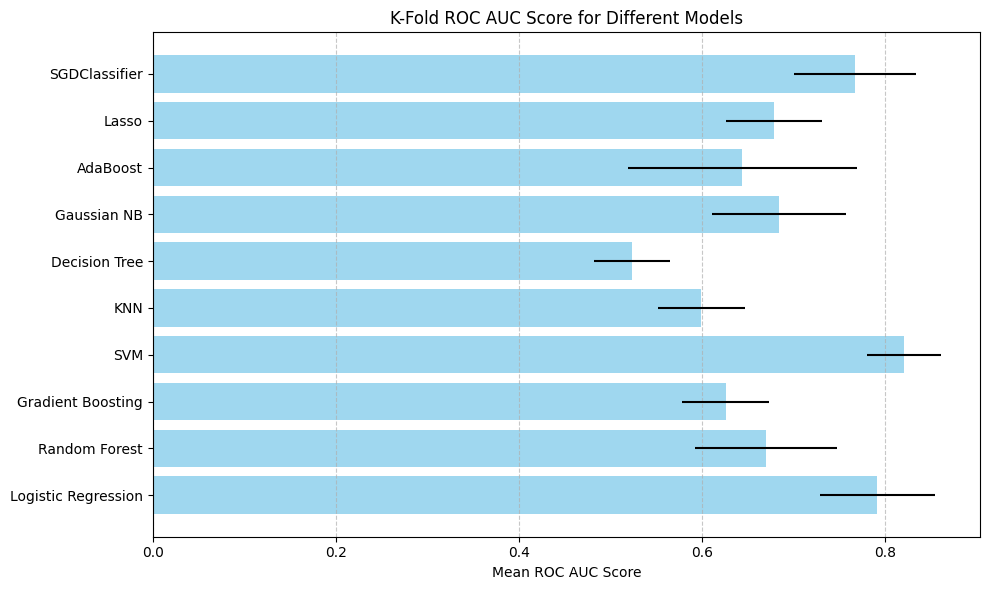

In [103]:
# Plotting K-Fold ROC AUC Scores
plt.figure(figsize=(10, 6))
model_names = list(model_auc_scores.keys())
mean_aucs = [model_auc_scores[name][0] for name in model_names]
std_aucs = [model_auc_scores[name][1] for name in model_names]

plt.barh(model_names, mean_aucs, xerr=std_aucs, color='skyblue', alpha=0.8)
plt.xlabel('Mean ROC AUC Score')
plt.title('K-Fold ROC AUC Score for Different Models')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## 3.2 create pipeline for final models

In [104]:
from sklearn.pipeline import Pipeline

In [105]:
# Create pipelines for the final models
pipelines = {
    'Logistic Regression': Pipeline([
        ('scaler', StandardScaler()),
        ('feature_selection', SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42))),
        ('pca', PCA(n_components=0.95, random_state=42)),
        ('model', LogisticRegression(C=0.1, penalty='l2', random_state=42, max_iter=1000))
    ]),
    'Random Forest': Pipeline([
        ('scaler', StandardScaler()),
        ('feature_selection', SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42))),
        ('pca', PCA(n_components=0.95, random_state=42)),
        ('model', RandomForestClassifier(n_estimators=100, random_state=42))
    ]),
    'Gradient Boosting': Pipeline([
        ('scaler', StandardScaler()),
        ('feature_selection', SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42))),
        ('pca', PCA(n_components=0.95, random_state=42)),
        ('model', GradientBoostingClassifier(n_estimators=100, random_state=42))
    ]),
    'SVM': Pipeline([
        ('scaler', StandardScaler()),
        ('feature_selection', SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42))),
        ('pca', PCA(n_components=0.95, random_state=42)),
        ('model', SVC(C=1.0, kernel='rbf', random_state=42, probability=True))
    ]),
    'KNN': Pipeline([
        ('scaler', StandardScaler()),
        ('feature_selection', SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42))),
        ('pca', PCA(n_components=0.95, random_state=42)),
        ('model', KNeighborsClassifier(n_neighbors=5))
    ]),
    'Decision Tree': Pipeline([
        ('scaler', StandardScaler()),
        ('feature_selection', SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42))),
        ('pca', PCA(n_components=0.95, random_state=42)),
        ('model', DecisionTreeClassifier(random_state=42))
    ]),
    'Gaussian NB': Pipeline([
        ('scaler', StandardScaler()),
        ('feature_selection', SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42))),
        ('pca', PCA(n_components=0.95, random_state=42)),
        ('model', GaussianNB())
    ]),
    'AdaBoost': Pipeline([
        ('scaler', StandardScaler()),
        ('feature_selection', SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42))),
        ('pca', PCA(n_components=0.95, random_state=42)),
        ('model', AdaBoostClassifier(n_estimators=100, random_state=42))
    ]),
    'Lasso': Pipeline([
        ('scaler', StandardScaler()),
        ('feature_selection', SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42))),
        ('pca', PCA(n_components=0.95, random_state=42)),
        ('model', Lasso(alpha=0.1, random_state=42))
    ]),
    'SGDClassifier': Pipeline([
        ('scaler', StandardScaler()),
        ('feature_selection', SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42))),
        ('pca', PCA(n_components=0.95, random_state=42)),
        ('model', SGDClassifier(max_iter=1000, tol=1e-3, random_state=42))
    ])
}

## evaluate mode using K-Folad cross-validation

In [106]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# store AUC score for plotting
model_kf_auc_scores = {}

for model_name, pipeline in pipelines.items():
    auc_scores = []
    for train_index, val_index in kf.split(X):
        X_kf_train, X_kf_val = X.iloc[train_index], X.iloc[val_index]
        y_kf_train, y_kf_val = y.iloc[train_index], y.iloc[val_index]
        pipeline.fit(X_kf_train, y_kf_train)
        if hasattr(pipeline.named_steps['model'], 'predict_proba'):
            y_kf_val_pred_prob = pipeline.predict_proba(X_kf_val)[:, 1]
        elif hasattr(pipeline.named_steps['model'], 'decision_function'):
            y_kf_val_pred_prob = pipeline.decision_function(X_kf_val)
        else:
            y_kf_val_pred_prob = pipeline.predict(X_kf_val)  # Use predictions directly for models without probability or decision function
        auc_scores.append(roc_auc_score(y_kf_val, y_kf_val_pred_prob))
    print(f"K-Fold Cross-validation ROC AUC Score ({model_name}): {np.mean(auc_scores):.4f} (+/- {np.std(auc_scores):.4f})")
    mean_auc = np.mean(auc_scores)
    std_auc = np.std(auc_scores)
    model_kf_auc_scores[model_name] = (mean_auc, std_auc)

K-Fold Cross-validation ROC AUC Score (Logistic Regression): 0.6785 (+/- 0.0889)
K-Fold Cross-validation ROC AUC Score (Random Forest): 0.5598 (+/- 0.0956)
K-Fold Cross-validation ROC AUC Score (Gradient Boosting): 0.6095 (+/- 0.0824)
K-Fold Cross-validation ROC AUC Score (SVM): 0.6662 (+/- 0.0844)
K-Fold Cross-validation ROC AUC Score (KNN): 0.5506 (+/- 0.0485)
K-Fold Cross-validation ROC AUC Score (Decision Tree): 0.5038 (+/- 0.0609)
K-Fold Cross-validation ROC AUC Score (Gaussian NB): 0.6074 (+/- 0.1148)
K-Fold Cross-validation ROC AUC Score (AdaBoost): 0.6494 (+/- 0.0773)
K-Fold Cross-validation ROC AUC Score (Lasso): 0.5301 (+/- 0.0681)
K-Fold Cross-validation ROC AUC Score (SGDClassifier): 0.6522 (+/- 0.0933)


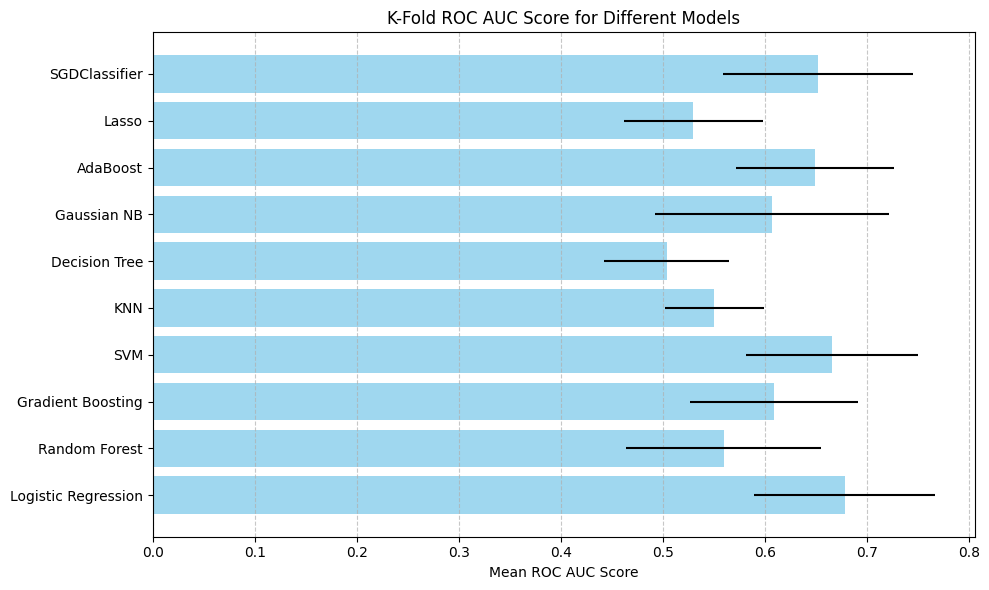

In [107]:
# Plotting K-Fold ROC AUC Scores
plt.figure(figsize=(10, 6))
model_names = list(model_kf_auc_scores.keys())
mean_aucs = [model_kf_auc_scores[name][0] for name in model_names]
std_aucs = [model_kf_auc_scores[name][1] for name in model_names]

plt.barh(model_names, mean_aucs, xerr=std_aucs, color='skyblue', alpha=0.8)
plt.xlabel('Mean ROC AUC Score')
plt.title('K-Fold ROC AUC Score for Different Models')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 4. Modeling Performance for whole training dataset

In [108]:
train = pd.read_csv('/kaggle/input/dont-overfit-ii/train.csv')
test = pd.read_csv('/kaggle/input/dont-overfit-ii/test.csv')

y=train['target']
X=train.drop(["id", "target"], axis=1)
test = test.drop(["id"], axis=1)

X_train = X
X_test = test
y_train = y
X_train['300'] = X_train.std(1)
X_test['300'] = X_test.std(1)
X_train['301'] = X_train.mean(1)
X_test['301'] = X_test.mean(1)





In [109]:
final_predictions = {}

for model_name, pipeline in pipelines.items():
    print(f"Training {model_name} on the entire dataset...")
    pipeline.fit(X_train, y_train)
    y_test_pred = pipeline.predict(X_test)
    final_predictions[model_name] = y_test_pred
    

# # Example: print final predictions for one of the models
# print("Predictions for Gradient Boosting:")
# print(final_predictions['Gradient Boosting'])

Training Logistic Regression on the entire dataset...
Training Random Forest on the entire dataset...
Training Gradient Boosting on the entire dataset...
Training SVM on the entire dataset...
Training KNN on the entire dataset...
Training Decision Tree on the entire dataset...
Training Gaussian NB on the entire dataset...
Training AdaBoost on the entire dataset...
Training Lasso on the entire dataset...
Training SGDClassifier on the entire dataset...


## 4.1 Model - Logistic Regression

In [111]:
submission = pd.DataFrame({'id': submission['id'], 'target': final_predictions["Logistic Regression"]})
submission.to_csv('/kaggle/working/submission.csv', index=False)

# 5. Submission & Performance Checking